# Results of the pipeline

In [79]:
import pickle
from autoembedding.results_manager import results2table
from pathlib import Path

# PATH = "./results/phylogenetic_results_emoglobina.pkl"
# PATH = "./results/enrichment_results_emoglobina.pkl"

# PATH = "./results/phylogenetic_results_topo.pkl"
PATH = "./results/enrichment_results_topo.pkl"

# PATH = "./results/phylogenetic_results_batterio.pkl"
# PATH = "./results/enrichment_results_batterio.pkl"


results = pickle.load(open(PATH, "rb"))
r, best_lst = results2table(
    results, 
    embedders= [
        # "dnabert", 
        "seqvec", 
        "prose", 
        "alphafold", 
        "esm"
        ],
    combiners = ["pca", "average", "sum", "max"],
    pcas = [ '10', '50', 'all'],
    metric="mean_adjusted_rand_score", 
    
    preferred_metric_embedding="euclidean", 
    preferred_method_embedding="average", 
    
    preferred_metric_gt="euclidean", # euclidean, average: equivalent to UPGMA when the gt is the distance matrix
    preferred_method_gt="average",
    
    preferred_edge_weight="jaccard",
    preferred_annotation="keywords"
)
r.to_latex("./latex_output.tex")
r

seqvec     prose  alphafold       esm
combiner dimensional PCA                                         
pca      10               0.214205  0.329444   0.105390  0.116791
         50               0.284878  0.331405   0.106039  0.144322
         all              0.302417  0.331388   0.107567  0.149714
average  10               0.166008  0.339450   0.085529  0.112586
         50               0.234696  0.347188   0.096526  0.156516
         all              0.251249  0.347197   0.092045  0.179916
sum      10               0.088457  0.280972   0.111430  0.073663
         50               0.077054  0.279975   0.097347  0.058070
         all              0.065388  0.281246   0.096437  0.051975
max      10               0.093573  0.361552   0.091071  0.155790
         50               0.106563  0.370374   0.097701  0.169250
         all              0.062878  0.366821   0.069685  0.228986

# Scores

In [80]:
# reverse the list, since the first element represent each point in its own cluster
best_lst = best_lst[::-1]

974


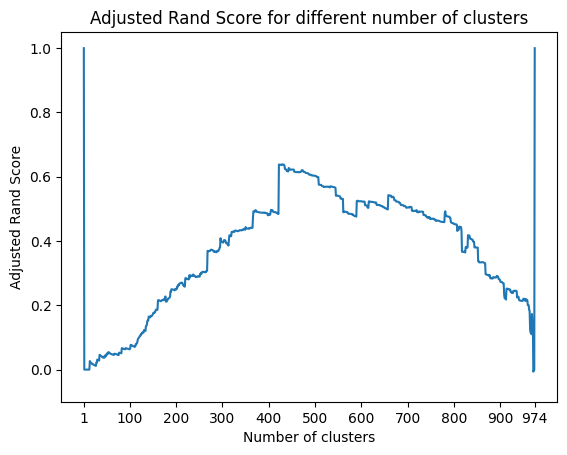

In [81]:
# do not plot the first and last CUT elements

import matplotlib.pyplot as plt
import numpy as np

# add 1 to to the beginning and the end of the best_list
best_lst.insert(0, 1)
best_lst.append(1)


plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand Score")
plt.title("Adjusted Rand Score for different number of clusters")

plt.ylim(-0.1, 1.05)

X = [i for i in range(1, len(best_lst) + 1)]
print(len(best_lst))

plt.xticks([i for i in range(0, len(best_lst)+1, 100)][1:] + [1] + [len(best_lst)])


plt.plot(X, best_lst)
plt.savefig(Path(PATH).stem + '.eps')


In [22]:
print(np.median(best_lst))
print(np.mean(best_lst))

0.1379519479372266
0.19260589130751563
